In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv("Algerican_forest_fires_cleaned _dataset.csv")

In [41]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [42]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [43]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [44]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [45]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [46]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [47]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [48]:
X=df.drop("FWI",axis=1)##independent feature 

In [49]:
y=df["FWI"]##dependent feature

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [52]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [53]:
y_train.shape,y_test.shape

((182,), (61,))

In [54]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,-0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,-0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,-0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,-0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,-0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,-0.188837


In [55]:
matrix=X_train.corr()
for i in range(len(matrix.columns)):
    for j in range(i):
        print(i,j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
5 4
6 0
6 1
6 2
6 3
6 4
6 5
7 0
7 1
7 2
7 3
7 4
7 5
7 6
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9


<AxesSubplot: >

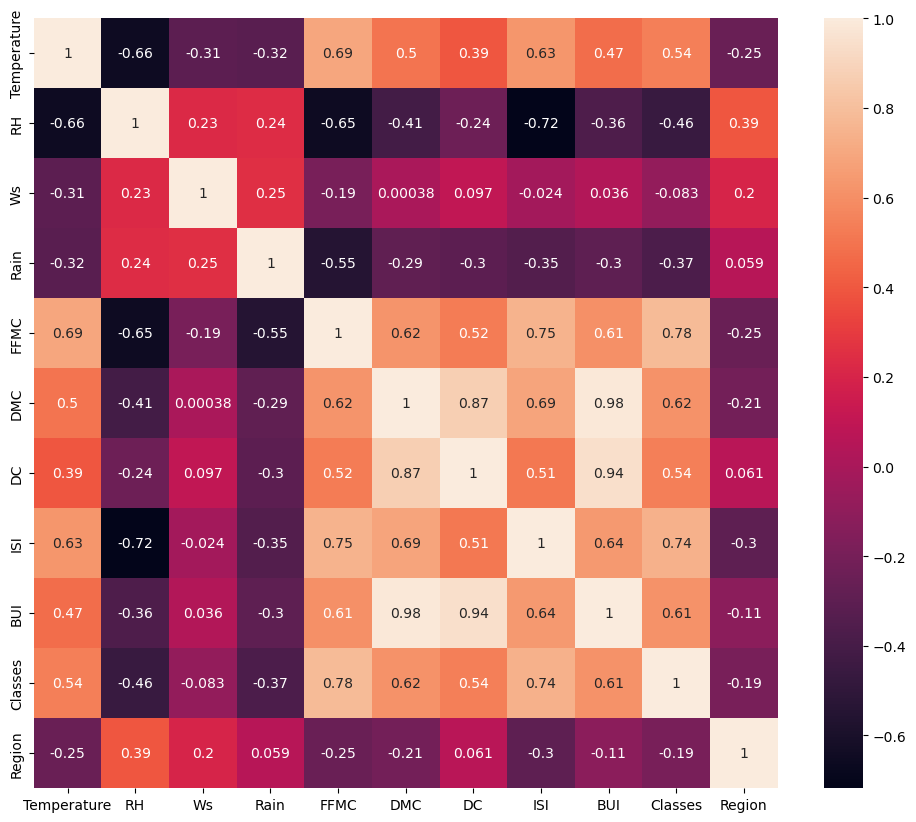

In [56]:
#check for multicollinerity
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [57]:
def correlation(dataset,threshold):
    corr_set=set()
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_set.add(colname)
    return corr_set

In [58]:
corr_features=correlation(X_train,0.85)

In [59]:
corr_features

{'BUI', 'DC'}

In [60]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()

In [63]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

/tmp/ipykernel_91/2419197912.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<AxesSubplot: title={'center': 'X Train After Scaled'}>

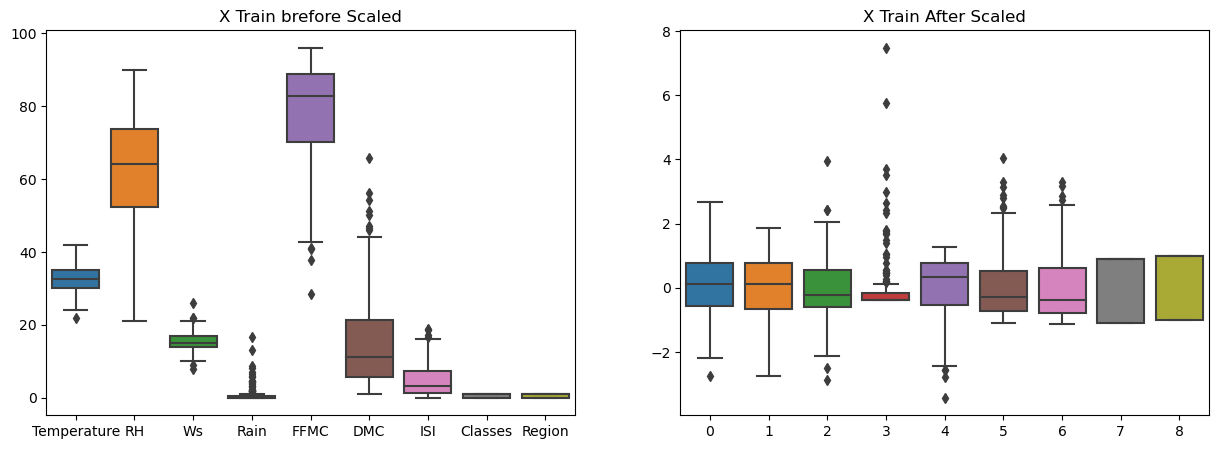

In [64]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("X Train brefore Scaled")
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title("X Train After Scaled")
sns.boxplot(data=X_train_scaled)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
linear=LinearRegression()

In [72]:
linear.fit(X_train_scaled,y_train)
y_predict=linear.predict(X_test_scaled)

In [73]:
y_predict.shape,y_test.shape

((61,), (61,))

In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
mae=mean_absolute_error(y_test,y_predict)

In [76]:
mae

0.5468236465249985

In [78]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)

In [79]:
score

0.9847657384266951

In [83]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MEA: ",mae)
print("Score: ",score)

MEA:  1.133175994914409
Score:  0.9492020263112388


In [87]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE ",mae)
print("Score ",score)

MAE  0.5642305340105692
Score  0.9842993364555513


In [90]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE ",mae)
print("Score ",score)

MAE  1.8822353634896005
Score  0.8753460589519703


In [91]:
import pickle
pickle.dump(scaler,open("Scaler_model.pkl",'wb'))
pickle.dump(ridge,open("Ridge_model.pkl",'wb'))